In [25]:
import numpy as np
from qutip import *

In [26]:
# from mpmath import *
# import matplotlib.pyplot as plt

# lam = 0.05

# gamma_0 = 0.2
# t = 0

# def s(t):
#     # Denominator Decomposition

#     coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
#     deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)

#     s =2*gamma_0/deno    #(2*np.imag(gamma_0)/deno)
#     return np.imag(s)

# print(s(2))

# # Define gammma(t)

# def gam(t):

#     # Denominator Decomposition

#     coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
#     deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)

#     gamma =2*gamma_0/deno    #(2*np.imag(gamma_0)/deno)
#     return np.real(gamma)

# gam(2)
# # Time array
# #time = np.linspace(1, 100, 1000)  # Adjust time range as needed

# # # Calculate gam values
# # gam_vals = [gam(t) for t in time]

# # # Plotting
# # plt.figure(figsize=(10, 6))
# # plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
# # plt.xlabel('Time')
# # plt.ylabel(r'$\gamma(t)$')
# # plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
# # plt.legend()
# # plt.grid(True)
# # plt.show()

In [31]:
lam = 0.0001
gamma_0 = 0.5
# time = np.linspace(0.1, 200, 100)  # Adjust time range as needed
times = time = np.linspace(0.1, 100, 10000)  #np.linspace(0.1,100, 100)

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression

def s(t):
    return np.imag(Expr(t))

#Define Hamiltonian

H0 = sigmam()*sigmap()

def gam(t):
    return np.real(Expr(t))

gam_vals = np.array([gam(t) for t in time])



Defining Hamiltonian and Collapse Operator for Master Equation/ MC Solver


In [32]:
# Second Attempt
from mpmath import *

#Define Hamiltonian

H0 = sigmam()*sigmap()

ops_and_rates = [[sigmap(),gam]]  # time-dependent collapse term
# c_ops = [[sigmap(),gam]]  # time-dependent collapse term

c_ops = [[sigmap(),gam_vals]]  # time-dependent collapse term


H_zero = Qobj(np.zeros((2, 2)))  # Zero operator for the Hamiltonian


#s(10,args)
# times = np.linspace(0.1, 100, 200)

psi0 = (basis(2, 0) + basis(2, 1)).unit() 


#[[H0,s]]
e_ops = [sigmax(), sigmay(), sigmaz()]

options = Options(store_states=True, nsteps=500000, atol=1e-8, rtol=1e-6)

result2 = mesolve(H_zero, psi0, time, c_ops, e_ops, options = options)

# Solve using mesolve


# result2 = nm_mcsolve([[H0,s]], 
#                      psi0, 
#                      times, 
#                      ops_and_rates, 
#                      e_ops,
#                      ntraj=2500, 
#                      options=options)


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\1246033994.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\1246033994.py:13: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)


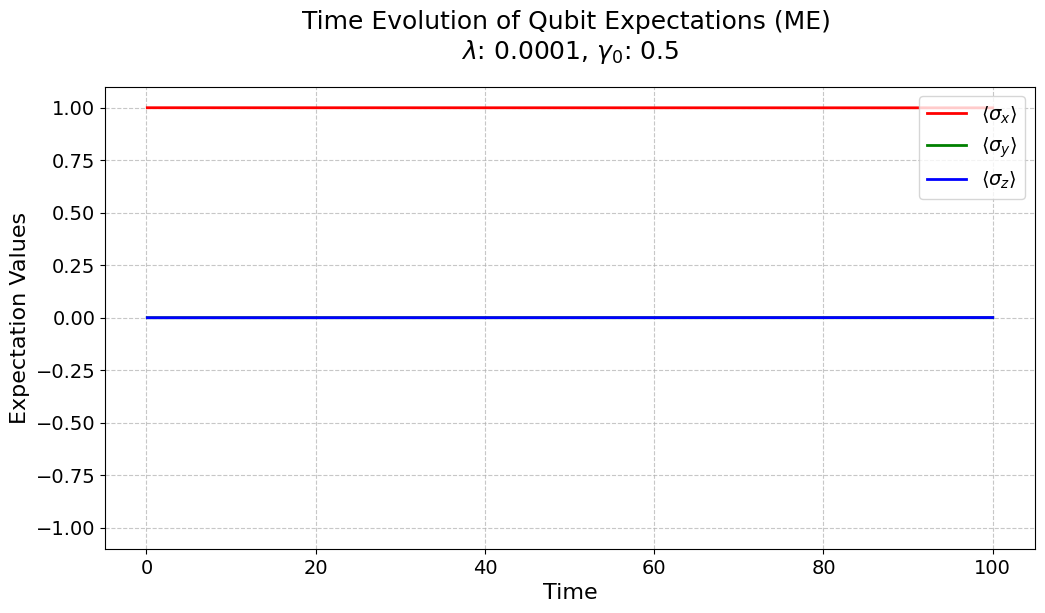

In [33]:
import matplotlib.pyplot as plt

# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(result2.times, result2.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


Plotting Monte-Carlo Solution

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16108\43004076.py:14: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16108\43004076.py:14: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)


10.0%. Run time:  51.80s. Est. time left: 00:00:07:46
20.0%. Run time: 136.53s. Est. time left: 00:00:09:06
30.0%. Run time: 285.68s. Est. time left: 00:00:11:06
40.0%. Run time: 418.64s. Est. time left: 00:00:10:27
50.0%. Run time: 552.80s. Est. time left: 00:00:09:12
60.0%. Run time: 666.04s. Est. time left: 00:00:07:24
70.0%. Run time: 771.10s. Est. time left: 00:00:05:30
80.0%. Run time: 856.57s. Est. time left: 00:00:03:34
90.0%. Run time: 975.42s. Est. time left: 00:00:01:48
100.0%. Run time: 1091.92s. Est. time left: 00:00:00:00
Total run time: 1096.50s


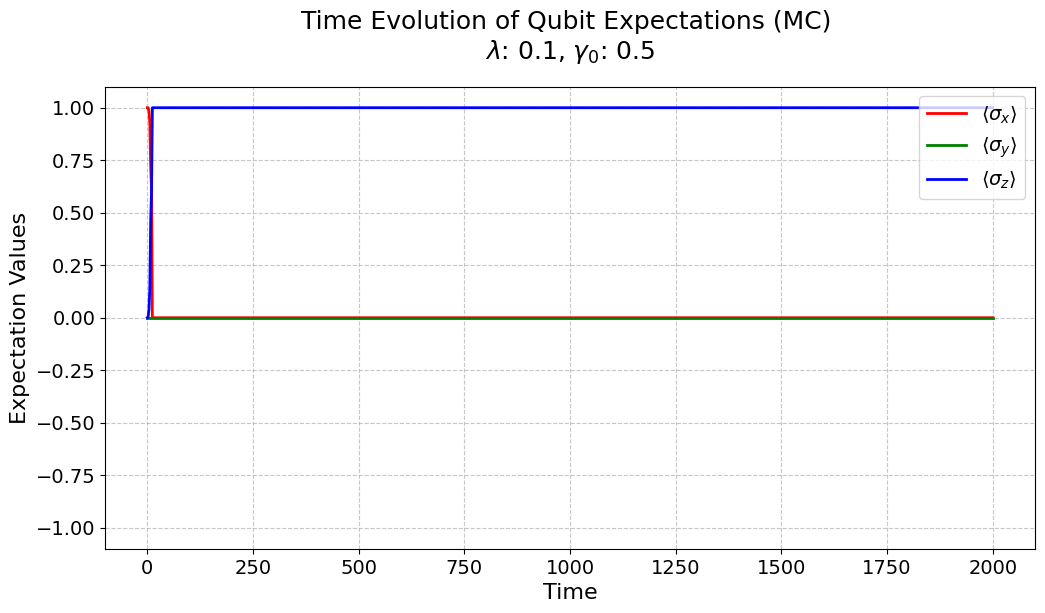

In [5]:
import matplotlib.pyplot as plt

data = mcsolve([[H0,s]], psi0, times, c_ops, e_ops, options = Options(store_states =True))
# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(data.times, data.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(data.times, data.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(data.times, data.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


Plotting Master Equation Solution


Plotting expectation values from Pre-calculated values from the Paper

## Formulas Used

### \( G(t) \)
The function \( G(t) \) is defined as:

$$ G(t) = e^{-\frac{\lambda}{2}t} \left( \cosh\left(\frac{\ell t}{2}\right) + \frac{\lambda}{\ell} \sinh\left(\frac{\ell t}{2}\right) \right) $$

where 

$$ \ell = \sqrt{\lambda^2 - 2\gamma_0\lambda} $$

### Initial State $$(\psi_0)$$
The initial state \(\psi_0\) is given by:

$$ \psi_0 = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) $$

### Density Matrix \(\rho\)
The density matrix \(\rho\) corresponding to \(\psi_0\) is:

$$ \rho = \ket{\psi_0}\bra{\psi_0} = \frac{1}{2} \begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} $$

### Expectation Values
The expectation values of the Pauli matrices \(\sigma_x\), \(\sigma_y\), and \(\sigma_z\) are given by:

#### \(\langle \sigma_x \rangle\)
$$ \langle \sigma_x \rangle = 2 \, \text{Re} \left( \rho_{10} G(t) \right) $$

#### \(\langle \sigma_y \rangle\)
$$ \langle \sigma_y \rangle = -2 \, \text{Im} \left( \rho_{10} G(t) \right) $$

#### \(\langle \sigma_z \rangle\)
$$ \langle \sigma_z \rangle = 1 - 2 \rho_{11} \left| G(t) \right|^2 $$

or, equivalently,

$$ \langle \sigma_z \rangle = 1 - 2 \rho_{11} G(t)^2 $$


In [34]:
# Manually Solving 
lam = 0.0001
gamma_0 = 0.5
def G(t):
    l = np.emath.sqrt(lam**2-2*gamma_0*lam)
    return np.exp(-(lam/2)*t)*(np.cosh((l*t)/2)+(lam/l)*np.sinh((l*t)/2))

# rho = 
psi0 = (basis(2, 0) + basis(2, 1)).unit() 

rho = ket2dm(psi0)
rho[0,0]

def rho_t(rho,t):
    rho = np.array(rho)
    rho.reshape(2,2)
    rho_00 = (1-G(t)**2)*rho[1,1] + rho[0,0]
    rho_01 = rho[0,1]*G(t) #I've to take conjugate Here! 
    rho_01 = rho[0,1]*np.conjugate(G(t))
    rho_10 = rho[1,0]*G(t)
    rho_11 = rho[1,1]*G(t)**2

    rho_1 = rho

    rho_1[0,0] = rho_00
    rho_1[0,1] = rho_01
    rho_1[1,0] = rho_10
    rho_1[1,1] = rho_11



    return rho_1


#operator_to_vector(rho)
def expec_x(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return 2*np.real(fuc)

def expec_y(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return -2*np.imag(fuc)

# def expec_z(rho,t): # rho is 2*2 matrix
#     if lam >= gamma_0:
#         fuc = 1 - 2*rho[1,1]*np.abs(G(t))**2

#     else:
#         l = np.sqrt(2*gamma_0*lam - lam**2)
#         mod = exp(-lam*t)*(np.cos(l*t/2)**2+((lam/l)*np.sin(l*t/2))**2)
#         fuc = 1 - 2*rho[1,1]*mod #2*rho[1,1]*mod - 1
#     return fuc
def expec_z(rho,t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G(t)**2)
    return fuc


# print(rho_t(rho,10))

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\2935838904.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\2935838904.py:18: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')


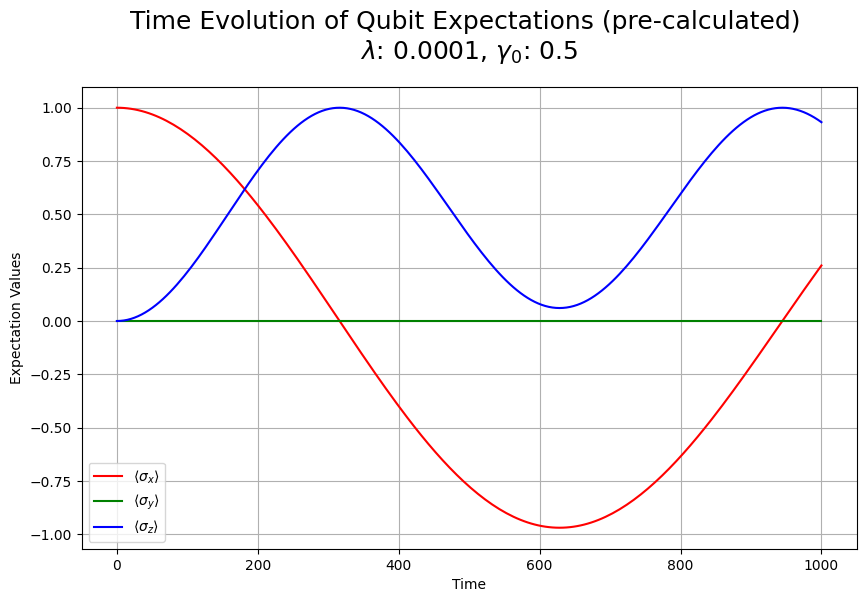

In [36]:
# Time array
time = np.linspace(0.1, 1000, 200)

# Calculate expectation values
expec_x_vals = [expec_x(rho, t) for t in time]
expec_y_vals = [expec_y(rho, t) for t in time]
expec_z_vals = [expec_z(rho, t) for t in time]

expec_z_vals

# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Manually Solving 
lam = 0.1
gamma_0 = 5
def G(t):
    l = np.emath.sqrt(lam**2-2*gamma_0*lam)
    return np.exp(-(lam/2)*t)*(np.cosh((l*t)/2)+(lam/l)*np.sinh((l*t)/2))

# rho = 
psi0 = (basis(2, 0) + basis(2, 1)).unit() 

rho = ket2dm(psi0)
#operator_to_vector(rho)
def expec_x(rho,t): # rho is 2*2 matrix
    fuc = (rho[1,0]+rho[0,1])*G(t) 
    return fuc

def expec_y(rho,t): # rho is 2*2 matrix
    fuc = -1j*(rho[1,0]-rho[0,1])*G(t) 
    return fuc

# def expec_z(rho,t): # rho is 2*2 matrix
#     if lam >= gamma_0:
#         fuc = 1 - 2*rho[1,1]*np.abs(G(t))**2

#     else:
#         l = np.sqrt(2*gamma_0*lam - lam**2)
#         mod = exp(-lam*t)*(np.cos(l*t/2)**2+((lam/l)*np.sin(l*t/2))**2)
#         fuc = 1 - 2*rho[1,1]*mod #2*rho[1,1]*mod - 1
#     return fuc
def expec_z(rho,t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G(t)**2)
    return fuc


<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\251015137.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18976\251015137.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


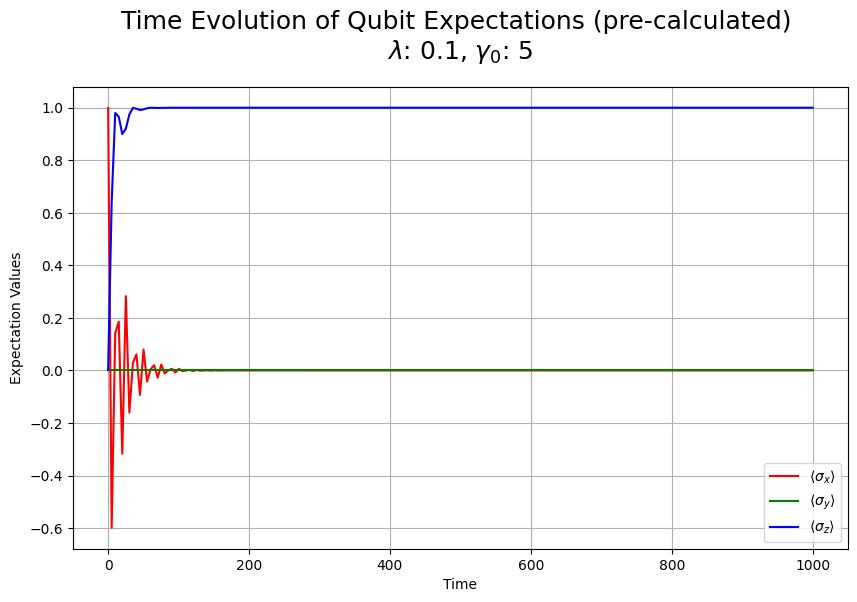

In [40]:
# Time array
time = np.linspace(0.1, 1000, 200)

# Calculate expectation values
expec_x_vals = [expec_x(rho, t) for t in time]
expec_y_vals = [expec_y(rho, t) for t in time]
expec_z_vals = [expec_z(rho, t) for t in time]


# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()